In [2]:
import numpy as np
import pandas as pd 

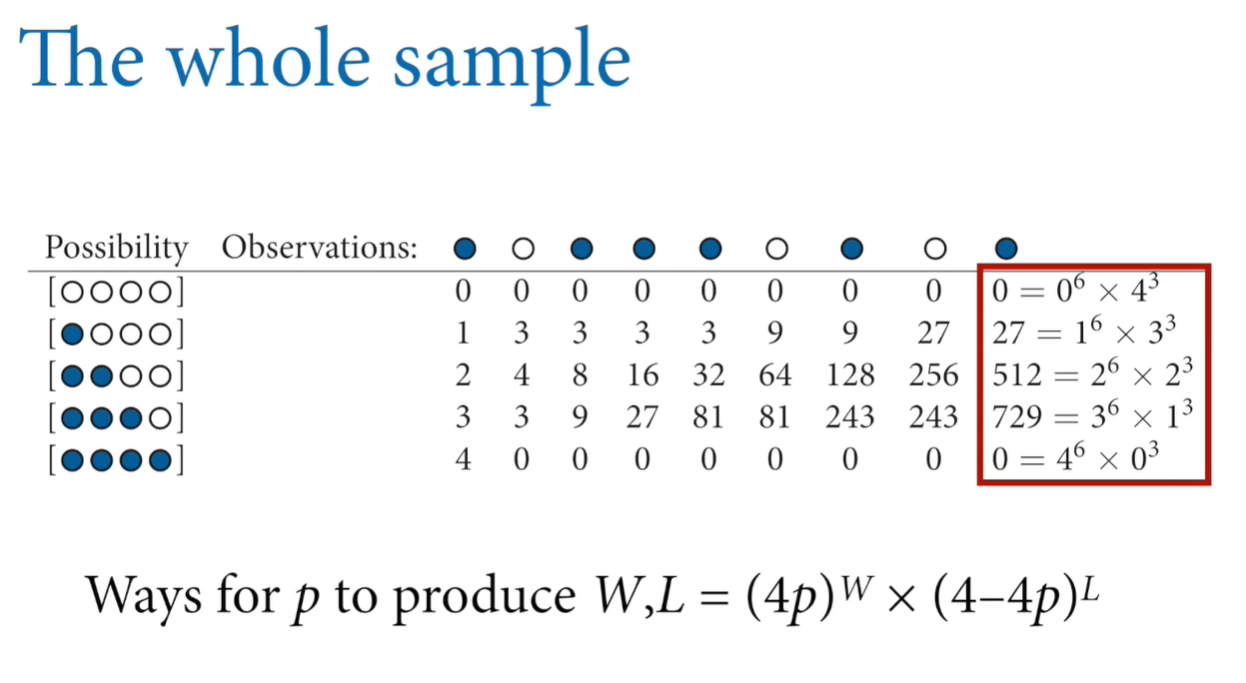

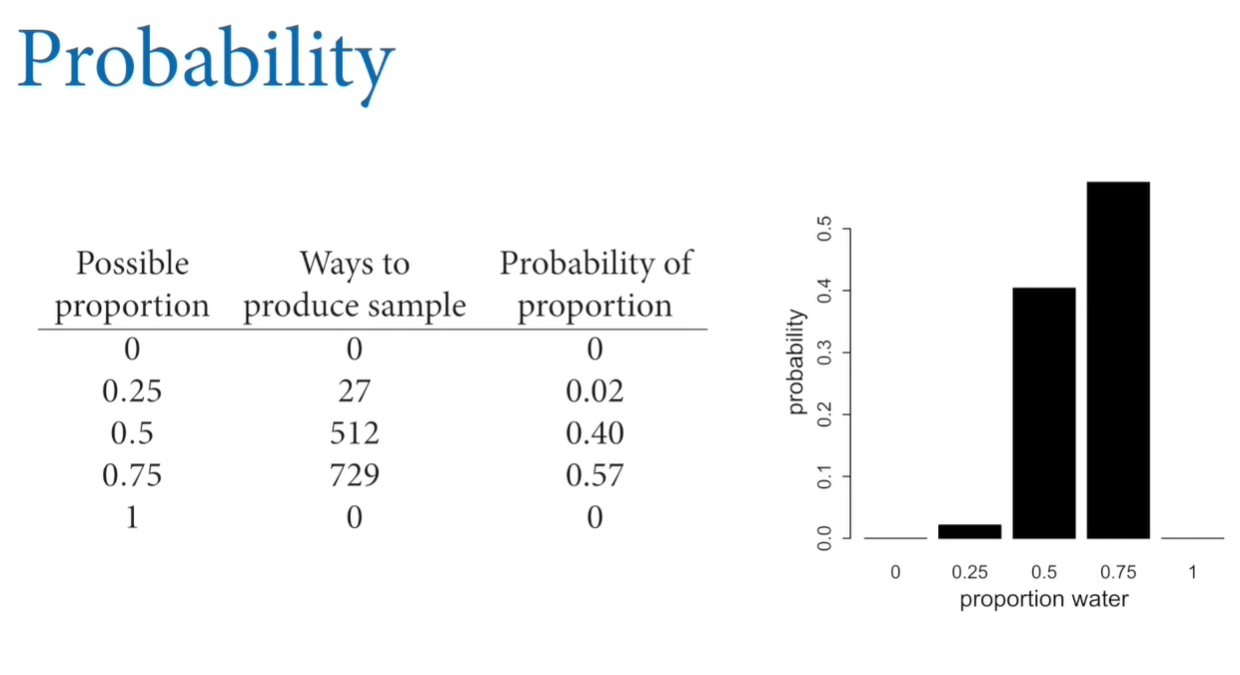

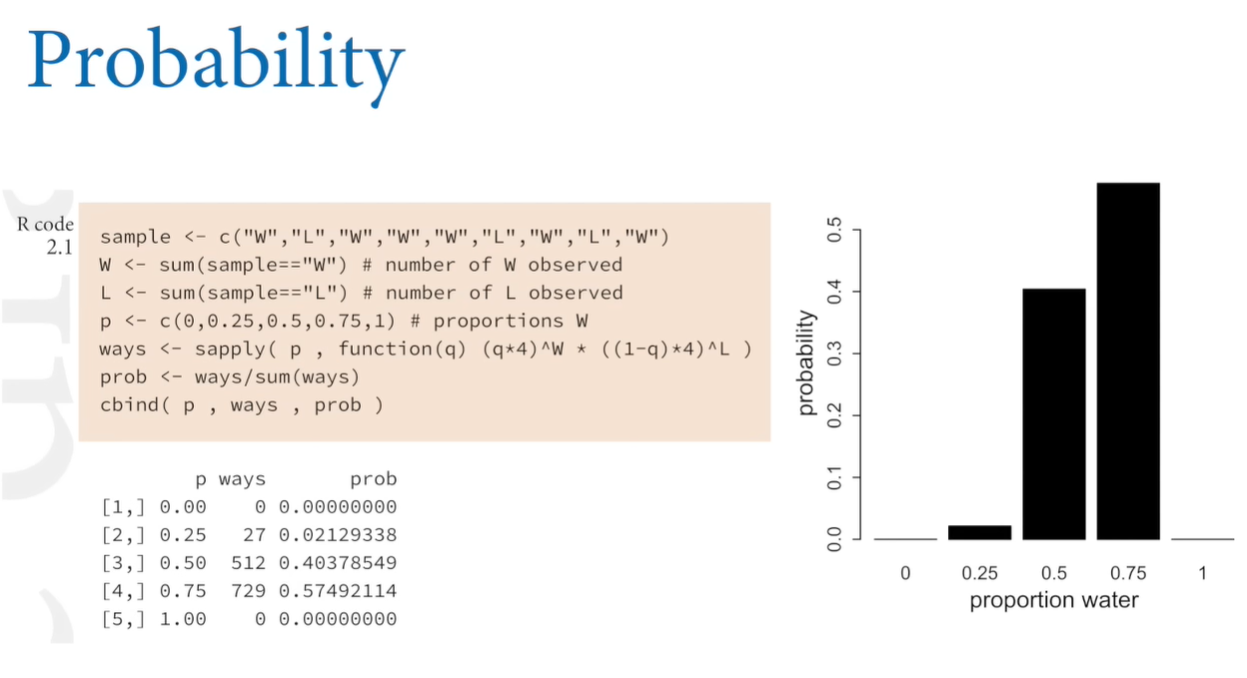

In [26]:
sample = ["W", "L", "W", "W", "W", "L", "W", "L", "W"]

w = sample.count("W")
l = sample.count("L")
proportions = [0, 0.25, 0.5, 0.75, 1]

df = pd.DataFrame()
for i, p in enumerate(proportions):
    # Ways to produce the sample
    ways = (4*p)**w * (4*(1-p))**l
    
    # Possible proportions and ways to produce the sample given the proportions
    row = pd.DataFrame({"poss": p, "ways": ways}, index=[i])
    df = pd.concat([df, row])
    
# Posterior Probability
df["post"] = (df["ways"] / df["ways"].sum()).round(2)

# A sample bar plot
df["bars"] = df["ways"].apply(lambda n: round((n / df["ways"].sum()) * 10) * "#")
df

,poss,ways,post,bars
0,0.00,0.0,0.00,
1,0.25,27.0,0.02,
2,0.50,512.0,0.40,####
3,0.75,729.0,0.57,######
4,1.00,0.0,0.00,


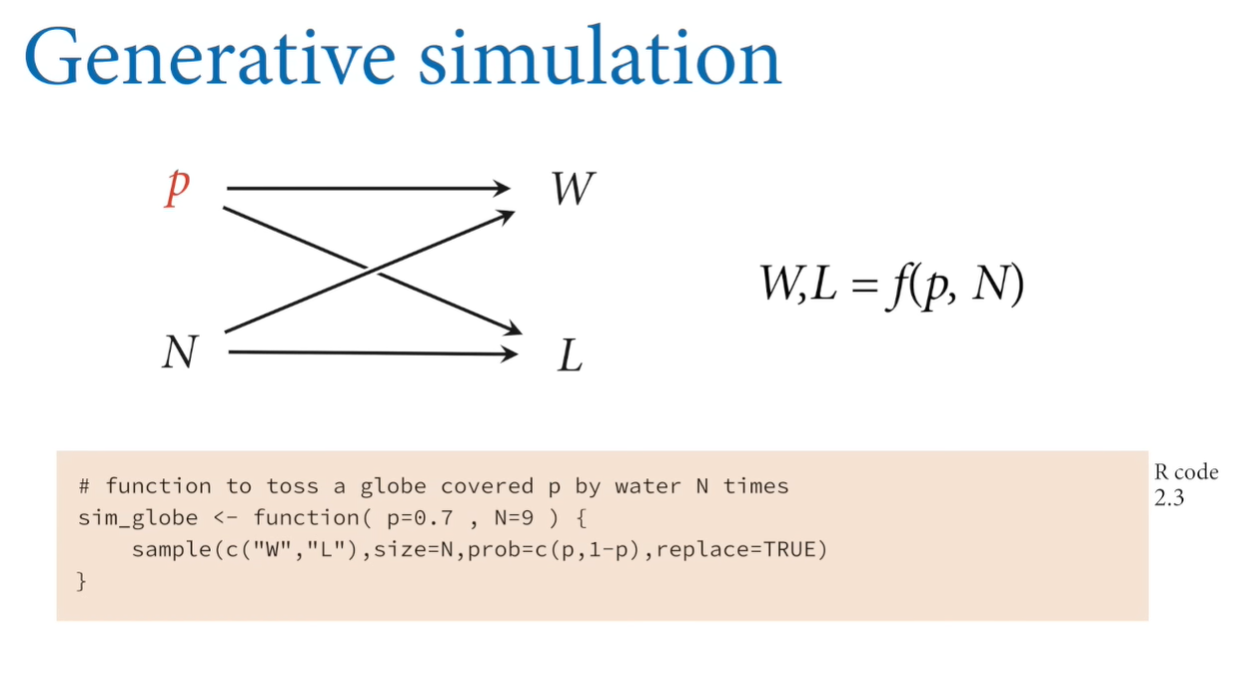

In [5]:
def sim_globe(p=0.7, N=9):
    sample = []
    for i in range(N):
        rnd = np.random.rand()
        item = "W" if rnd <= p else "L"
        sample.append(item)
    return sample

In [27]:
p = 0.6
N = 10
sample = sim_globe(p, N)
print(sample)
print(f"Proportion: {sample.count('W') / N}")

['W', 'W', 'W', 'L', 'L', 'W', 'L', 'W', 'W', 'W']


In [35]:
# Replicating for 10 times

for i in range(10):
    sample = sim_globe(p, N)
    print(f"{i}: {sample} | W: {sample.count('W')}, L: {sample.count('L')}")

0: ['W', 'W', 'L', 'W', 'W', 'W', 'L', 'L', 'W', 'L'] | W: 6, L: 4
1: ['W', 'L', 'L', 'L', 'L', 'L', 'W', 'W', 'W', 'W'] | W: 5, L: 5
2: ['W', 'W', 'W', 'W', 'L', 'W', 'L', 'W', 'L', 'W'] | W: 7, L: 3
3: ['L', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'L', 'W'] | W: 5, L: 5
4: ['L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'L'] | W: 8, L: 2
5: ['W', 'W', 'L', 'W', 'W', 'L', 'W', 'L', 'W', 'W'] | W: 7, L: 3
6: ['L', 'W', 'W', 'W', 'L', 'L', 'W', 'W', 'L', 'W'] | W: 6, L: 4
7: ['W', 'W', 'L', 'L', 'W', 'W', 'W', 'W', 'W', 'L'] | W: 7, L: 3
8: ['L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'L'] | W: 8, L: 2
9: ['W', 'W', 'L', 'L', 'W', 'L', 'L', 'W', 'W', 'L'] | W: 5, L: 5


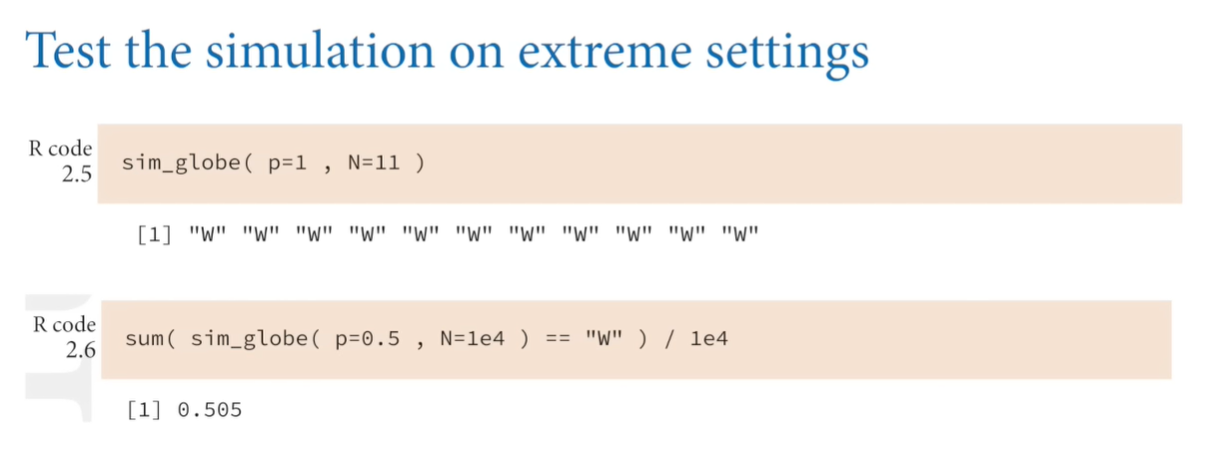

In [42]:
p = 1
N = 11
sample = sim_globe(p, N)
print(sample)

['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [44]:
# For large samples the proportion of in the sample should be very close to p

p = 0.5
N = int(1e4)
sample = sim_globe(p, N)
print(f"Proportion: {sample.count('W') / N}")

Proportion: 0.5016


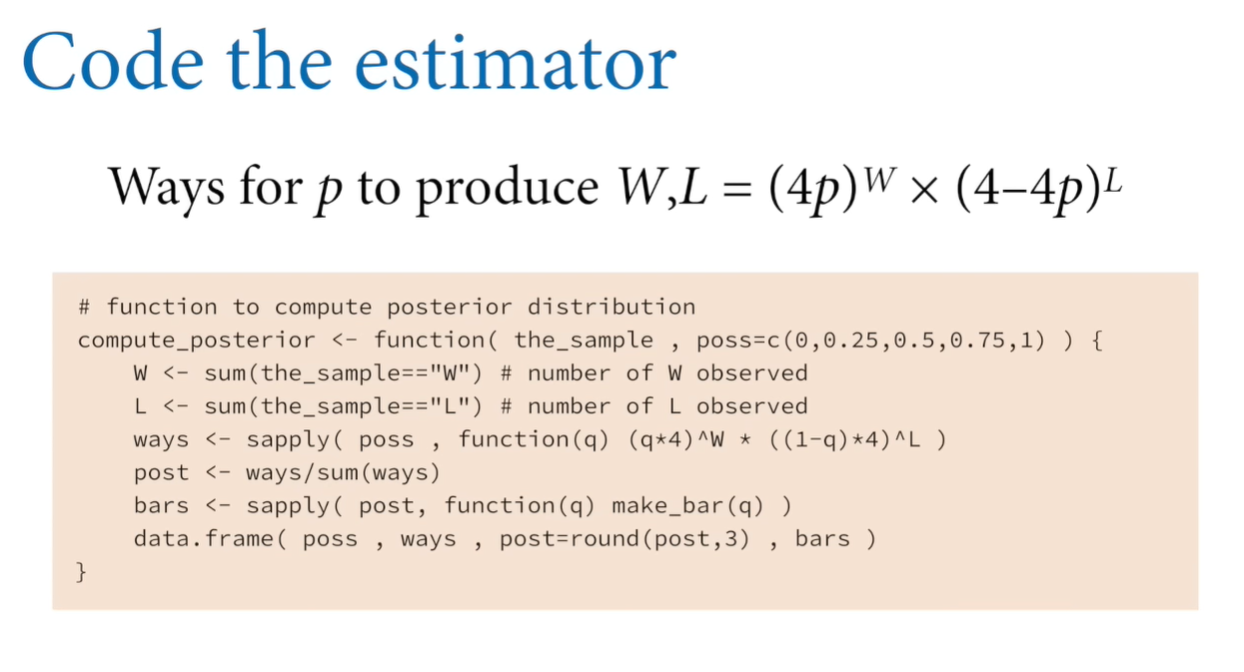

In [47]:
def compute_posterior(the_sample, poss=[0, 0.25, 0.5, 0.75, 1]):
    w = the_sample.count("W")
    l = the_sample.count("L")
    
    df = pd.DataFrame()
    for i, p in enumerate(poss):
        # Ways to produce the sample
        ways = (4*p)**w * (4*(1-p))**l

        # Possible proportions and ways to produce the sample given the proportions
        row = pd.DataFrame({"poss": p, "ways": ways}, index=[i])
        df = pd.concat([df, row])
    
    # Posterior Probability
    df["post"] = (df["ways"] / df["ways"].sum()).round(2)

    # Bar plot
    df["bars"] = df["ways"].apply(lambda n: round((n / df["ways"].sum()) * 10) * "#")
    return df

In [48]:
p = 0.6
N = 10
sample = sim_globe(p, N)

print(f"The Sample: {sample}")
print(f"Proportion: {sample.count('W') / N}")

compute_posterior(the_sample=sample)

The Sample: ['L', 'W', 'L', 'W', 'W', 'L', 'L', 'L', 'W', 'W']
Proportion: 0.5


,poss,ways,post,bars
0,0.00,0.0,0.00,
1,0.25,243.0,0.16,##
2,0.50,1024.0,0.68,#######
3,0.75,243.0,0.16,##
4,1.00,0.0,0.00,


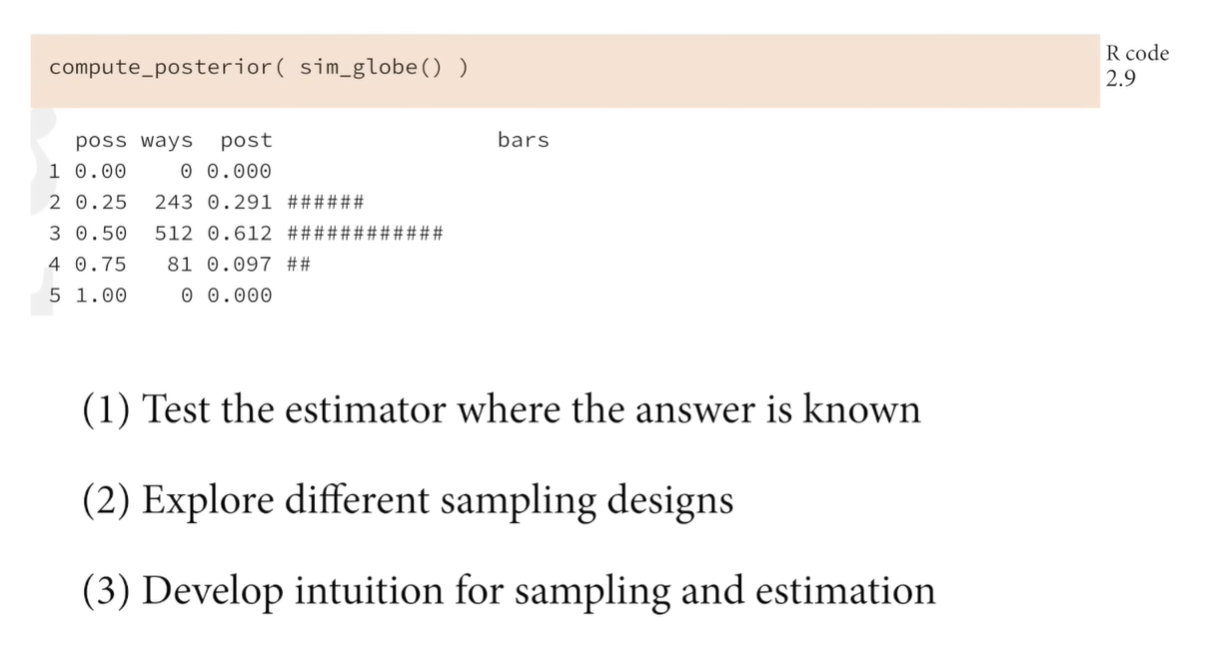


#### When we test the estimator where the answer is known, we can see that as the sample size increases it converges to the right answer and when the sample size is small it correctly characterizes the uncertainty.